# Walking in Greater Mexico 

## Exploratory Analysis

### Import Libraries

In [161]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Prepare Data

##### 1.1 Load Data: person and housing level (CDMX and EDOMEX)

In [162]:
p_cdmx = pd.read_csv("Personas09.CSV")

In [163]:
p_edomex = pd.read_csv("Personas15.CSV")

In [164]:
p_edomex

,ENT,MUN,LOC50K,ID_VIV,ID_PERSONA,COBERTURA,ESTRATO,UPM,FACTOR,CLAVIVP,NUMPER,SEXO,EDAD,PARENTESCO,IDENT_MADRE,IDENT_PADRE,ENT_PAIS_NAC,NACIONALIDAD,SERSALUD,AFRODES,REGIS_NAC,DHSERSAL1,DHSERSAL2,RELIGION,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,DIS_BANARSE,DIS_HABLAR,DIS_MENTAL,CAU_VER,CAU_OIR,CAU_CAMINAR,CAU_RECORDAR,CAU_BANARSE,CAU_HABLAR,CAU_MENTAL,HLENGUA,QDIALECT_INALI,HESPANOL,ELENGUA,PERTE_INDIGENA,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,NOMCAR_C,ALFABET,ESCOACUM,ENT_PAIS_RES_5A,MUN_RES_5A,CAUSA_MIG_V,SITUA_CONYUGAL,IDENT_PAREJA,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,HORTRA,ACTIVIDADES_C,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,IDENT_HIJO,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,EDAD_MORIR_TD,TAMLOC
0,15,1,0,150010000001,15001000000100001,2,15-001-0000-04,1,9,1,3,3,18,301,1,96,15,1,5,3,1,1,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,106.0,15.0,4.0,6.0,NaN,NaN,4.0,3.0,NaN,1.0,12.0,15.0,1.0,NaN,8.0,NaN,15.0,522.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,6259.0,1.0,15.0,7.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,15,1,0,150010000001,15001000000100002,2,15-001-0000-04,1,9,1,2,1,22,301,1,96,15,1,5,3,1,9,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,106.0,15.0,3.0,6.0,NaN,NaN,11.0,4.0,811.0,1.0,16.0,15.0,1.0,NaN,8.0,NaN,15.0,952.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645.0,5.0,4611.0,106.0,15.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,15,1,0,150010000001,15001000000100003,2,15-001-0000-04,1,9,1,1,3,50,101,96,97,15,1,1,3,1,8,NaN,1101,3,1,1,1,1,1,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,85.0,15.0,2.0,8.0,NaN,NaN,11.0,2.0,311.0,1.0,14.0,15.0,1.0,NaN,3.0,NaN,10.0,522.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3440.0,40.0,6251.0,1.0,15.0,7.0,NaN,NaN,NaN,3.0,0.0,3.0,3.0,2001.0,1.0,3.0,NaN,NaN,NaN,NaN,2
3,15,1,0,150010000002,15001000000200001,2,15-001-0000-04,1,9,2,2,3,16,301,1,98,15,1,7,3,1,9,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,14.0,15.0,3.0,6.0,NaN,NaN,4.0,1.0,NaN,1.0,10.0,15.0,1.0,NaN,8.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,15,1,0,150010000002,15001000000200002,2,15-001-0000-04,1,9,2,3,3,74,401,97,97,15,1,7,3,1,9,NaN,1101,1,3,1,1,1,1,6,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,1.0,6.0,15.0,1.0,NaN,8.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0,1974.0,1.0,1.0,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228480,15,125,0,151250001671,15125000167100001,2,15-125-0000-10,1,1,1,5,3,1,301,2,1,15,1,6,3,1,6,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1228481,15,125,0,151250001671,15125000167100002,2,15-125-0000-10,1,1,1,3,1,7,301,99,99,15,1,6,3,1,6,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,59.0,15.0,1.0,11.0,NaN,NaN,2.0,1.0,NaN,1.0,1.0,15.0,33.0,906.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1228482,15,125,0,151250001671,15125000167100003,2,15-125

In [165]:
vi_cdmx = pd.read_csv("Viviendas09.CSV")

In [166]:
vi_edomex = pd.read_csv("Viviendas15.CSV")

##### 1.2 Combine dataframes based on the **ID_VIV** column

In [167]:
dm_cdmx = pd.merge(p_cdmx,vi_cdmx,on = "ID_VIV")

In [168]:
dm_edomex = pd.merge(p_edomex,vi_edomex,on = "ID_VIV")

##### 1.3 Append dataframes cdmx and edomex

In [169]:
dm_zmvm = dm_cdmx.append(dm_edomex)

In [170]:
pd.set_option('max_columns', None)

In [171]:
dm_zmvm

,ENT_x,MUN_x,LOC50K_x,ID_VIV,ID_PERSONA,COBERTURA_x,ESTRATO_x,UPM_x,FACTOR_x,CLAVIVP_x,NUMPER,SEXO,EDAD,PARENTESCO,IDENT_MADRE,IDENT_PADRE,ENT_PAIS_NAC,NACIONALIDAD,SERSALUD,AFRODES,REGIS_NAC,DHSERSAL1,DHSERSAL2,RELIGION,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,DIS_BANARSE,DIS_HABLAR,DIS_MENTAL,CAU_VER,CAU_OIR,CAU_CAMINAR,CAU_RECORDAR,CAU_BANARSE,CAU_HABLAR,CAU_MENTAL,HLENGUA,QDIALECT_INALI,HESPANOL,ELENGUA,PERTE_INDIGENA,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,NOMCAR_C,ALFABET,ESCOACUM,ENT_PAIS_RES_5A,MUN_RES_5A,CAUSA_MIG_V,SITUA_CONYUGAL,IDENT_PAREJA,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,HORTRA,ACTIVIDADES_C,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,IDENT_HIJO,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,EDAD_MORIR_TD,TAMLOC_x,ENT_y,MUN_y,LOC50K_y,COBERTURA_y,ESTRATO_y,UPM_y,FACTOR_y,CLAVIVP_y,PAREDES,TECHOS,PISOS,COCINA,CUADORM,TOTCUART,LUG_COC,COMBUSTIBLE,ESTUFA,ELECTRICIDAD,FOCOS,FOCOS_AHORRA,AGUA_ENTUBADA,ABA_AGUA_ENTU,ABA_AGUA_NO_ENTU,TINACO,CISTERNA,BOMBA_AGUA,REGADERA,BOILER,CALENTADOR_SOLAR,AIRE_ACON,PANEL_SOLAR,SERSAN,CONAGUA,USOEXC,DRENAJE,SEPARACION1,SEPARACION2,SEPARACION3,SEPARACION4,DESTINO_BAS,REFRIGERADOR,LAVADORA,HORNO,AUTOPROP,MOTOCICLETA,BICICLETA,RADIO,TELEVISOR,COMPUTADORA,TELEFONO,CELULAR,INTERNET,SERV_TV_PAGA,SERV_PEL_PAGA,CON_VJUEGOS,TENENCIA,ESCRITURAS,FORMA_ADQUI,FINANCIAMIENTO1,FINANCIAMIENTO2,FINANCIAMIENTO3,DEUDA,NUMPERS,DUE1_NUM,DUE2_NUM,MCONMIG,MNUMPERS,INGR_PEROTROPAIS,INGR_PERDENTPAIS,INGR_AYUGOB,INGR_JUBPEN,ALIMENTACION,ALIM_ADL1,ALIM_ADL2,ING_ALIM_ADL1,ING_ALIM_ADL2,ING_ALIM_ADL3,TIPOHOG,INGTRHOG,JEFE_SEXO,JEFE_EDAD,TAMLOC_y
0,9,2,1,90020000001,9002000000100001,2,09-002-0001-00,1,27,1,1,3,72,101,97,97,16,1,1,3,1,1,NaN,1332,1,1,1,2,1,1,6,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,1.0,6.0,9.0,2.0,NaN,7.0,2.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,16.0,4631.0,2.0,9.0,1.0,1.0,NaN,NaN,3.0,0.0,3.0,3.0,1980.0,1.0,4.0,NaN,NaN,NaN,NaN,5,9,2,1,2,09-002-0001-00,1,27,1,8.0,10.0,3.0,1.0,3.0,4.0,1.0,2.0,NaN,1.0,8.0,8.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,8.0,1.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,1.0,1.0,8.0,NaN,NaN,NaN,8,1.0,NaN,3,NaN,2,4,5,7,3,2,4,2,4,6,2,58050.0,3,72,5
1,9,2,1,90020000001,9002000000100002,2,09-002-0001-00,1,27,1,2,1,77,201,97,97,16,1,1,3,1,1,NaN,1101,1,1,3,1,1,1,6,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,1.0,6.0,9.0,2.0,NaN,7.0,1.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,56.0,4611.0,2.0,9.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,2,1,2,09-002-0001-00,1,27,1,8.0,10.0,3.0,1.0,3.0,4.0,1.0,2.0,NaN,1.0,8.0,8.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,8.0,1.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,1.0,1.0,8.0,NaN,NaN,NaN,8,1.0,NaN,3,NaN,2,4,5,7,3,2,4,2,4,6,2,58050.0,3,72,5
2,9,2,1,90020000001,9002000000100003,2,09-002-0001-00,1,27,1,3,3,47,301,1,2,9,1,1,3,1,1,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,1.0,12.0,9.0,2.0,NaN,5.0,5.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,56.0,8121.0,2.0,9.0,1.0,1.0,NaN,NaN,2.0,0.0,2.0,10.0,2005.0,1.0,8.0,NaN,NaN,NaN,NaN,5,9,2,1,2,09-002-0001-00,1,27,1,8.0,10.0,3.0,1.0,3.0,4.0,1.0,2.0,NaN,1.0,8.0,8.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,8.0,1.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,1.0,1.0,8.0,NaN,NaN,NaN,8,1.0,NaN,3,NaN,2,4,5,7,3,2,4,2,4,6,2,58050.0,3,72,5
3,9,2,1,90020000001,9002000000100004,2,09-002-0001-00,1,27,1,4,3,40,301,1,2,9,1,5,3,1,5,NaN,1101,3,1,1,1,1,1,6,1.0,NaN,NaN

##### 1.4 Drop the rows from entities that don't belong to the Greater Mexico City

In [172]:
no_zmvm_edomex = dm_zmvm[(dm_zmvm['ENT_x'] == 15)]

In [173]:
mun_zmvm_noedomex = (1,3,4,5,6,7,8,12,14,18,19,21,26,27,32,40,41,42,43,45,47,48,49,51,52,54,55,56,62,63,64,66,67,71,72,73,74,76,77,78,79,80,82,85,86,87,88,90,97,98,101,102,105,106,107,110,111,113,114,115,116,117,118,119,123,124)

In [174]:
no_zmvm_edomex = no_zmvm_edomex[(no_zmvm_edomex['MUN_x']).isin (mun_zmvm_noedomex)]

In [175]:
no_zmvm_edomex

,ENT_x,MUN_x,LOC50K_x,ID_VIV,ID_PERSONA,COBERTURA_x,ESTRATO_x,UPM_x,FACTOR_x,CLAVIVP_x,NUMPER,SEXO,EDAD,PARENTESCO,IDENT_MADRE,IDENT_PADRE,ENT_PAIS_NAC,NACIONALIDAD,SERSALUD,AFRODES,REGIS_NAC,DHSERSAL1,DHSERSAL2,RELIGION,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,DIS_BANARSE,DIS_HABLAR,DIS_MENTAL,CAU_VER,CAU_OIR,CAU_CAMINAR,CAU_RECORDAR,CAU_BANARSE,CAU_HABLAR,CAU_MENTAL,HLENGUA,QDIALECT_INALI,HESPANOL,ELENGUA,PERTE_INDIGENA,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,NOMCAR_C,ALFABET,ESCOACUM,ENT_PAIS_RES_5A,MUN_RES_5A,CAUSA_MIG_V,SITUA_CONYUGAL,IDENT_PAREJA,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,HORTRA,ACTIVIDADES_C,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,IDENT_HIJO,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,EDAD_MORIR_TD,TAMLOC_x,ENT_y,MUN_y,LOC50K_y,COBERTURA_y,ESTRATO_y,UPM_y,FACTOR_y,CLAVIVP_y,PAREDES,TECHOS,PISOS,COCINA,CUADORM,TOTCUART,LUG_COC,COMBUSTIBLE,ESTUFA,ELECTRICIDAD,FOCOS,FOCOS_AHORRA,AGUA_ENTUBADA,ABA_AGUA_ENTU,ABA_AGUA_NO_ENTU,TINACO,CISTERNA,BOMBA_AGUA,REGADERA,BOILER,CALENTADOR_SOLAR,AIRE_ACON,PANEL_SOLAR,SERSAN,CONAGUA,USOEXC,DRENAJE,SEPARACION1,SEPARACION2,SEPARACION3,SEPARACION4,DESTINO_BAS,REFRIGERADOR,LAVADORA,HORNO,AUTOPROP,MOTOCICLETA,BICICLETA,RADIO,TELEVISOR,COMPUTADORA,TELEFONO,CELULAR,INTERNET,SERV_TV_PAGA,SERV_PEL_PAGA,CON_VJUEGOS,TENENCIA,ESCRITURAS,FORMA_ADQUI,FINANCIAMIENTO1,FINANCIAMIENTO2,FINANCIAMIENTO3,DEUDA,NUMPERS,DUE1_NUM,DUE2_NUM,MCONMIG,MNUMPERS,INGR_PEROTROPAIS,INGR_PERDENTPAIS,INGR_AYUGOB,INGR_JUBPEN,ALIMENTACION,ALIM_ADL1,ALIM_ADL2,ING_ALIM_ADL1,ING_ALIM_ADL2,ING_ALIM_ADL3,TIPOHOG,INGTRHOG,JEFE_SEXO,JEFE_EDAD,TAMLOC_y
0,15,1,0,150010000001,15001000000100001,2,15-001-0000-04,1,9,1,3,3,18,301,1,96,15,1,5,3,1,1,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,106.0,15.0,4.0,6.0,NaN,NaN,4.0,3.0,NaN,1.0,12.0,15.0,1.0,NaN,8.0,NaN,15.0,522.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,6259.0,1.0,15.0,7.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,15,1,0,2,15-001-0000-04,1,9,1,7.0,10.0,2.0,1.0,3.0,5.0,1.0,2.0,NaN,1.0,7.0,7.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,7.0,1.0,1.0,3.0,6.0,7.0,2.0,4.0,5.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,2.0,2.0,8.0,NaN,NaN,NaN,3,99.0,NaN,3,NaN,2,3,6,8,3,2,4,2,4,6,1,4085.0,3,50,2
1,15,1,0,150010000001,15001000000100002,2,15-001-0000-04,1,9,1,2,1,22,301,1,96,15,1,5,3,1,9,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,106.0,15.0,3.0,6.0,NaN,NaN,11.0,4.0,811.0,1.0,16.0,15.0,1.0,NaN,8.0,NaN,15.0,952.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645.0,5.0,4611.0,106.0,15.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,15,1,0,2,15-001-0000-04,1,9,1,7.0,10.0,2.0,1.0,3.0,5.0,1.0,2.0,NaN,1.0,7.0,7.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,7.0,1.0,1.0,3.0,6.0,7.0,2.0,4.0,5.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,2.0,2.0,8.0,NaN,NaN,NaN,3,99.0,NaN,3,NaN,2,3,6,8,3,2,4,2,4,6,1,4085.0,3,50,2
2,15,1,0,150010000001,15001000000100003,2,15-001-0000-04,1,9,1,1,3,50,101,96,97,15,1,1,3,1,8,NaN,1101,3,1,1,1,1,1,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,1.0,85.0,15.0,2.0,8.0,NaN,NaN,11.0,2.0,311.0,1.0,14.0,15.0,1.0,NaN,3.0,NaN,10.0,522.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3440.0,40.0,6251.0,1.0,15.0,7.0,NaN,NaN,NaN,3.0,0.0,3.0,3.0,2001.0,1.0,3.0,NaN,NaN,NaN,NaN,2,15,1,0,2,15-001-0000-04,1,9,1,7.0,10.0,2.0,1.0,3.0,5.0,1.0,2.0,NaN,1.0,7.0,7.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,7.0,1.0,1.0,3.0,6.0,7.0,2.0,4.0,5.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,2.0,2.0,8.0,NaN,NaN,NaN,3,99.0,NaN,3,NaN,2,3,6,8,3,2,4,2,4,6,1,4085.0,3,50,2
3,15,1,0,150010000002,15001000000200001,2,15-001-0000-04,1,9,2,2,3,16,301,1,98,15,1,7,3,1,9,NaN,1101,

In [176]:
no_zmvm_edomex_persona = no_zmvm_edomex['ID_PERSONA']

In [177]:
zmvm = (dm_zmvm[~dm_zmvm.ID_PERSONA.isin(no_zmvm_edomex.ID_PERSONA)])

In [178]:
zmvm

,ENT_x,MUN_x,LOC50K_x,ID_VIV,ID_PERSONA,COBERTURA_x,ESTRATO_x,UPM_x,FACTOR_x,CLAVIVP_x,NUMPER,SEXO,EDAD,PARENTESCO,IDENT_MADRE,IDENT_PADRE,ENT_PAIS_NAC,NACIONALIDAD,SERSALUD,AFRODES,REGIS_NAC,DHSERSAL1,DHSERSAL2,RELIGION,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,DIS_BANARSE,DIS_HABLAR,DIS_MENTAL,CAU_VER,CAU_OIR,CAU_CAMINAR,CAU_RECORDAR,CAU_BANARSE,CAU_HABLAR,CAU_MENTAL,HLENGUA,QDIALECT_INALI,HESPANOL,ELENGUA,PERTE_INDIGENA,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,NOMCAR_C,ALFABET,ESCOACUM,ENT_PAIS_RES_5A,MUN_RES_5A,CAUSA_MIG_V,SITUA_CONYUGAL,IDENT_PAREJA,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,HORTRA,ACTIVIDADES_C,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,IDENT_HIJO,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,EDAD_MORIR_TD,TAMLOC_x,ENT_y,MUN_y,LOC50K_y,COBERTURA_y,ESTRATO_y,UPM_y,FACTOR_y,CLAVIVP_y,PAREDES,TECHOS,PISOS,COCINA,CUADORM,TOTCUART,LUG_COC,COMBUSTIBLE,ESTUFA,ELECTRICIDAD,FOCOS,FOCOS_AHORRA,AGUA_ENTUBADA,ABA_AGUA_ENTU,ABA_AGUA_NO_ENTU,TINACO,CISTERNA,BOMBA_AGUA,REGADERA,BOILER,CALENTADOR_SOLAR,AIRE_ACON,PANEL_SOLAR,SERSAN,CONAGUA,USOEXC,DRENAJE,SEPARACION1,SEPARACION2,SEPARACION3,SEPARACION4,DESTINO_BAS,REFRIGERADOR,LAVADORA,HORNO,AUTOPROP,MOTOCICLETA,BICICLETA,RADIO,TELEVISOR,COMPUTADORA,TELEFONO,CELULAR,INTERNET,SERV_TV_PAGA,SERV_PEL_PAGA,CON_VJUEGOS,TENENCIA,ESCRITURAS,FORMA_ADQUI,FINANCIAMIENTO1,FINANCIAMIENTO2,FINANCIAMIENTO3,DEUDA,NUMPERS,DUE1_NUM,DUE2_NUM,MCONMIG,MNUMPERS,INGR_PEROTROPAIS,INGR_PERDENTPAIS,INGR_AYUGOB,INGR_JUBPEN,ALIMENTACION,ALIM_ADL1,ALIM_ADL2,ING_ALIM_ADL1,ING_ALIM_ADL2,ING_ALIM_ADL3,TIPOHOG,INGTRHOG,JEFE_SEXO,JEFE_EDAD,TAMLOC_y
0,9,2,1,90020000001,9002000000100001,2,09-002-0001-00,1,27,1,1,3,72,101,97,97,16,1,1,3,1,1,NaN,1332,1,1,1,2,1,1,6,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,1.0,6.0,9.0,2.0,NaN,7.0,2.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,16.0,4631.0,2.0,9.0,1.0,1.0,NaN,NaN,3.0,0.0,3.0,3.0,1980.0,1.0,4.0,NaN,NaN,NaN,NaN,5,9,2,1,2,09-002-0001-00,1,27,1,8.0,10.0,3.0,1.0,3.0,4.0,1.0,2.0,NaN,1.0,8.0,8.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,8.0,1.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,1.0,1.0,8.0,NaN,NaN,NaN,8,1.0,NaN,3,NaN,2,4,5,7,3,2,4,2,4,6,2,58050.0,3,72,5
1,9,2,1,90020000001,9002000000100002,2,09-002-0001-00,1,27,1,2,1,77,201,97,97,16,1,1,3,1,1,NaN,1101,1,1,3,1,1,1,6,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,1.0,6.0,9.0,2.0,NaN,7.0,1.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,56.0,4611.0,2.0,9.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,2,1,2,09-002-0001-00,1,27,1,8.0,10.0,3.0,1.0,3.0,4.0,1.0,2.0,NaN,1.0,8.0,8.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,8.0,1.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,1.0,1.0,8.0,NaN,NaN,NaN,8,1.0,NaN,3,NaN,2,4,5,7,3,2,4,2,4,6,2,58050.0,3,72,5
2,9,2,1,90020000001,9002000000100003,2,09-002-0001-00,1,27,1,3,3,47,301,1,2,9,1,1,3,1,1,NaN,1101,1,1,1,1,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,7.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,1.0,12.0,9.0,2.0,NaN,5.0,5.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,56.0,8121.0,2.0,9.0,1.0,1.0,NaN,NaN,2.0,0.0,2.0,10.0,2005.0,1.0,8.0,NaN,NaN,NaN,NaN,5,9,2,1,2,09-002-0001-00,1,27,1,8.0,10.0,3.0,1.0,3.0,4.0,1.0,2.0,NaN,1.0,8.0,8.0,1.0,1.0,NaN,1.0,4.0,6.0,7.0,1.0,3.0,6.0,8.0,1.0,1.0,3.0,1.0,1.0,3.0,5.0,8.0,1.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,7.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,1.0,1.0,1.0,8.0,NaN,NaN,NaN,8,1.0,NaN,3,NaN,2,4,5,7,3,2,4,2,4,6,2,58050.0,3,72,5
3,9,2,1,90020000001,9002000000100004,2,09-002-0001-00,1,27,1,4,3,40,301,1,2,9,1,5,3,1,5,NaN,1101,3,1,1,1,1,1,6,1.0,NaN,NaN

##### 1.5 Drop Columns that are not interesting for our analysis

In [179]:
columns_todrop1 = ["LOC50K_x","COBERTURA_x","ESTRATO_x","UPM_x","FACTOR_x","CLAVIVP_x","NUMPER","PARENTESCO","IDENT_MADRE","IDENT_PADRE","ENT_PAIS_NAC","NACIONALIDAD","AFRODES","REGIS_NAC","DHSERSAL2","RELIGION","DIS_BANARSE","DIS_HABLAR","DIS_MENTAL","CAU_HABLAR","CAU_MENTAL","HLENGUA","QDIALECT_INALI","HESPANOL","ELENGUA","PERTE_INDIGENA","NOMCAR_C","ALFABET","ENT_PAIS_RES_5A","MUN_RES_5A","MUN_RES_5A","CAUSA_MIG_V","SITUA_CONYUGAL","IDENT_PAREJA","HORTRA","ACTIVIDADES_C","HIJOS_NAC_VIVOS","HIJOS_FALLECIDOS","HIJOS_SOBREVIV","FECHA_NAC_M","FECHA_NAC_A","SOBREVIVENCIA","IDENT_HIJO","EDAD_MORIR_D","EDAD_MORIR_M","EDAD_MORIR_A","EDAD_MORIR_TD","TAMLOC_x","ENT_y","MUN_y","LOC50K_y","COBERTURA_y","ESTRATO_y","UPM_y","FACTOR_y","CLAVIVP_y","PAREDES","TECHOS","PISOS","COCINA","CUADORM","TOTCUART","LUG_COC","COMBUSTIBLE","ESTUFA","ELECTRICIDAD","FOCOS","FOCOS_AHORRA","AGUA_ENTUBADA","ABA_AGUA_ENTU","ABA_AGUA_NO_ENTU","ABA_AGUA_NO_ENTU","TINACO","CISTERNA","BOMBA_AGUA","REGADERA","BOILER","CALENTADOR_SOLAR","AIRE_ACON","PANEL_SOLAR","SERSAN","CONAGUA","USOEXC","DRENAJE","SEPARACION1","SEPARACION2","SEPARACION3","SEPARACION4","DESTINO_BAS","REFRIGERADOR","LAVADORA","HORNO","RADIO","TELEVISOR","COMPUTADORA","TELEFONO","CELULAR","INTERNET","SERV_TV_PAGA","SERV_PEL_PAGA","CON_VJUEGOS","TENENCIA","ESCRITURAS","FORMA_ADQUI","FINANCIAMIENTO1","FINANCIAMIENTO2","FINANCIAMIENTO3","DEUDA","NUMPERS","DUE1_NUM","DUE2_NUM","MCONMIG","MNUMPERS","INGR_PEROTROPAIS","INGR_PERDENTPAIS","INGR_AYUGOB","INGR_JUBPEN","ALIMENTACION","ALIM_ADL1","ALIM_ADL2","ING_ALIM_ADL1","ING_ALIM_ADL2","ING_ALIM_ADL3","TIPOHOG","TAMLOC_y"]

In [180]:
zmvm.drop(columns_todrop1, axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
zmvm

,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,CAU_VER,CAU_OIR,CAU_CAMINAR,CAU_RECORDAR,CAU_BANARSE,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
0,9,2,90020000001,9002000000100001,3,72,1,1,1,1,1,2,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
1,9,2,90020000001,9002000000100002,1,77,1,1,1,1,3,1,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
2,9,2,90020000001,9002000000100003,3,47,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
3,9,2,90020000001,9002000000100004,3,40,5,5,3,1,1,1,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
4,9,2,90020000001,9002000000100005,1,45,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,NaN,7.0,2.0,4.0,58050.0,3,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228480,15,125,151250001671,15125000167100001,3,1,6,6,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32
1228481,15,125,151250001671,15125000167100002,1,7,6,6,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,59.0,15.0,1.0,11.0,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32
1228482,15,125,151250001671,15125000167100003,3,5,6,6,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,59.0,15.0,1.0,11.0,NaN,NaN,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32
1228483,15,125,151250001671,15125000167100004,3,32,9,9,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,9.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32


##### 1.6 Convert dataset into CSV

In [182]:
zmvm.to_csv('zmvm.csv')

### 2. Exploratory/Cleaning Data Analysis

#### 1.- Data Profiling Report to make a quick exploratory data report.

##### For this first exploratory data we choose the minimal version. Otherwise it takes too long to execute. We will execute a second one, once our database is cleaned.

##### SCHOOL

In [183]:
zmvm_expl = pd.read_csv("zmvm.csv")

In [184]:
profile = ProfileReport(zmvm_expl, minimal=True)
profile.to_file(output_file="zmvm.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.- Split the databases between: those who conmute to the school, those who conmute to the work, those who conmute to both

In [185]:
zmvm_esc = zmvm_expl[(zmvm_expl.MED_TRASLADO_ESC1.notnull()) |(zmvm_expl.MED_TRASLADO_ESC2 == 1)|(zmvm_expl.MED_TRASLADO_ESC3 == 1)]

In [186]:
zmvm_esc

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,CAU_VER,CAU_OIR,CAU_CAMINAR,CAU_RECORDAR,CAU_BANARSE,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,999.0,15.0,1.0,1.0,NaN,NaN,3.0,2.0,8.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,16.0,9.0,3.0,1.0,3.0,NaN,11.0,1.0,13.0,10.0,253.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,15.0,9.0,3.0,1.0,3.0,NaN,7.0,2.0,4.0,58050.0,3,72
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,104.0,15.0,1.0,2.0,NaN,NaN,11.0,4.0,16.0,10.0,281.0,1.0,1.0,3.0,5.0,7.0,1.0,4.0,6.0,7500.0,5.0,9.0,3.0,1.0,6.0,NaN,7.0,2.0,3.0,80500.0,1,57
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,5.0,9.0,3.0,1.0,5.0,NaN,11.0,2.0,14.0,15.0,941.0,3.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,3000.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,3.0,80500.0,1,57
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,2.0,9.0,1.0,1.0,NaN,NaN,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,4.0,0.0,3,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,151250001666,15125000166600003,3,6,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,81.0,15.0,1.0,11.0,NaN,NaN,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,0.0,1,61
962372,1228475,15,125,151250001669,15125000166900004,3,13,7,9,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,59.0,15.0,1.0,11.0,NaN,NaN,3.0,1.0,7.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,4.0,20000.0,1,42
962374,1228477,15,125,151250001670,15125000167000002,1,4,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,59.0,15.0,1.0,8.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,4.0,13740.0,3,47
962378,1228481,15,125,151250001671,15125000167100002,1,7,6,6,1,1,1,1,NaN,NaN,NaN,NaN,NaN,1.0,59.0,15.0,1.0,11.0,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32


In [187]:
escuela = ProfileReport(zmvm_esc, minimal=True)
profile.to_file(output_file="escuela.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [188]:
col_esc_todrop = ["CAU_VER","CAU_OIR","CAU_CAMINAR","CAU_RECORDAR","CAU_BANARSE","MED_TRASLADO_TRAB3","MED_TRASLADO_TRAB2","MED_TRASLADO_TRAB1","TIE_TRASLADO_TRAB","ENT_PAIS_TRAB","MUN_TRAB","INGTRMEN","CREDITO_VIVIENDA","SAR_AFORE","INCAP_SUELDO","UTILIDADES","SERVICIO_MEDICO","VACACIONES","AGUINALDO","SITTRA","OCUPACION_C"]

In [189]:
zmvm_esc.drop(col_esc_todrop, axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [190]:
zmvm_esc

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,CONACT,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,NaN,NaN,3.0,2.0,8.0,50.0,7.0,2.0,4.0,58050.0,3,72
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,NaN,11.0,1.0,13.0,10.0,7.0,2.0,4.0,58050.0,3,72
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,NaN,NaN,11.0,4.0,16.0,10.0,7.0,2.0,3.0,80500.0,1,57
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,NaN,11.0,2.0,14.0,15.0,7.0,2.0,3.0,80500.0,1,57
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,NaN,NaN,2.0,3.0,3.0,NaN,8.0,2.0,4.0,0.0,3,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,151250001666,15125000166600003,3,6,1,1,1,1,1,1,1.0,81.0,15.0,1.0,11.0,NaN,NaN,1.0,2.0,0.0,NaN,7.0,2.0,3.0,0.0,1,61
962372,1228475,15,125,151250001669,15125000166900004,3,13,7,9,1,1,1,1,1.0,59.0,15.0,1.0,11.0,NaN,NaN,3.0,1.0,7.0,50.0,7.0,2.0,4.0,20000.0,1,42
962374,1228477,15,125,151250001670,15125000167000002,1,4,1,1,1,1,1,1,1.0,59.0,15.0,1.0,8.0,NaN,NaN,1.0,1.0,0.0,NaN,7.0,2.0,4.0,13740.0,3,47
962378,1228481,15,125,151250001671,15125000167100002,1,7,6,6,1,1,1,1,1.0,59.0,15.0,1.0,11.0,NaN,NaN,2.0,1.0,1.0,NaN,7.0,2.0,3.0,6000.0,1,32


In [191]:
zmvm_esc['MED_TRASLADO_ESC1'].isnull().sum()

0

In [192]:
zmvm_esc['MED_TRASLADO_ESC3'].isnull().sum()

238899

In [193]:
zmvm_esc['MED_TRASLADO_ESC2'] = zmvm_esc['MED_TRASLADO_ESC2'].replace(np.nan, 0)

<ipython-input-193-fd241088552e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['MED_TRASLADO_ESC2'] = zmvm_esc['MED_TRASLADO_ESC2'].replace(np.nan, 0)


In [194]:
zmvm_esc['MED_TRASLADO_ESC2'].isnull().sum()

0

In [195]:
zmvm_esc['MED_TRASLADO_ESC3'] = zmvm_esc['MED_TRASLADO_ESC3'].replace(np.nan, 0)

<ipython-input-195-ca7b466fb6a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['MED_TRASLADO_ESC3'] = zmvm_esc['MED_TRASLADO_ESC3'].replace(np.nan, 0)


In [196]:
zmvm_esc['MED_TRASLADO_ESC3'].isnull().sum()

0

In [197]:
zmvm_esc['CONACT'].isnull().sum()

110277

In [198]:
zmvm_esc.drop('CONACT', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [199]:
zmvm_esc

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,151250001666,15125000166600003,3,6,1,1,1,1,1,1,1.0,81.0,15.0,1.0,11.0,0.0,0.0,1.0,2.0,0.0,7.0,2.0,3.0,0.0,1,61
962372,1228475,15,125,151250001669,15125000166900004,3,13,7,9,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,3.0,1.0,7.0,7.0,2.0,4.0,20000.0,1,42
962374,1228477,15,125,151250001670,15125000167000002,1,4,1,1,1,1,1,1,1.0,59.0,15.0,1.0,8.0,0.0,0.0,1.0,1.0,0.0,7.0,2.0,4.0,13740.0,3,47
962378,1228481,15,125,151250001671,15125000167100002,1,7,6,6,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,2.0,1.0,1.0,7.0,2.0,3.0,6000.0,1,32


In [200]:
zmvm_esc.fillna(0)

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,151250001666,15125000166600003,3,6,1,1,1,1,1,1,1.0,81.0,15.0,1.0,11.0,0.0,0.0,1.0,2.0,0.0,7.0,2.0,3.0,0.0,1,61
962372,1228475,15,125,151250001669,15125000166900004,3,13,7,9,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,3.0,1.0,7.0,7.0,2.0,4.0,20000.0,1,42
962374,1228477,15,125,151250001670,15125000167000002,1,4,1,1,1,1,1,1,1.0,59.0,15.0,1.0,8.0,0.0,0.0,1.0,1.0,0.0,7.0,2.0,4.0,13740.0,3,47
962378,1228481,15,125,151250001671,15125000167100002,1,7,6,6,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,2.0,1.0,1.0,7.0,2.0,3.0,6000.0,1,32


In [201]:
zmvm_esc['MED_TRASLADO_ESC1'].unique()

array([ 1.,  2.,  6.,  5.,  3., 11.,  8.,  4.,  7., 12., 10.,  9., 99.])

In [202]:
print (zmvm_esc.loc[zmvm_esc['MED_TRASLADO_ESC1'] == 99])

        Unnamed: 0  ENT_x  MUN_x        ID_VIV         ID_PERSONA  SEXO  EDAD  \
26360        26360      9      3   90030002692   9003000269200003     3    27   
42529        42529      9      4   90040002132   9004000213200001     1    14   
70394        70394      9      6   90060001226   9006000122600002     3    21   
83315        83315      9      6   90060004849   9006000484900003     1    36   
100819      100819      9      7   90070004162   9007000416200005     1    23   
...            ...    ...    ...           ...                ...   ...   ...   
957910     1224013     15    125  151250000372  15125000037200001     1    21   
957945     1224048     15    125  151250000382  15125000038200001     1    20   
958992     1225095     15    125  151250000660  15125000066000003     1    16   
959917     1226020     15    125  151250000886  15125000088600001     1    27   
960133     1226236     15    125  151250000940  15125000094000004     1    18   

        SERSALUD  DHSERSAL1

In [203]:
zmvm_esc = zmvm_esc[zmvm_esc.MED_TRASLADO_ESC1 != 99]

In [204]:
zmvm_esc['MED_TRASLADO_ESC3'].unique()

array([ 0.,  6.,  9.,  5., 11., 12., 10.,  8.,  4.,  7.,  3.])

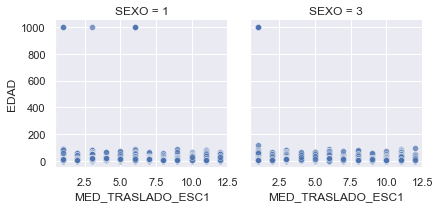

In [205]:
g = sns.FacetGrid(zmvm_esc, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_ESC1", "EDAD", alpha=.7)
g.add_legend()

In [206]:
zmvm_esc['EDAD'].unique()

array([ 14,  21,  24,  22,  10,   9,  17,  20,   7,  15,  16,   4,   8,
        11,  23,  27,  29,  12,  19,  18,  13,   6,  30,  26,  28,   5,
        25,  36,  46,  31,  49,  48,  53,  52,  35,  51,  43,   3,  42,
        34,  45,  38,  39, 999,  68,  47,  33,  32,  57,  56,  40,  64,
        65,  37,  55,  44,  69,  71,  59,  66,  60,  41,  80,  61,  50,
        72,  70,  63,  62,  54,  58,  79,  74,  73,  76,  90,  67,  88,
        83,  91,  78,  85,  82,  87,  75,  81,  77,  84, 122,  89,  94])

In [207]:
zmvm_esc = zmvm_esc[zmvm_esc.EDAD != 999]

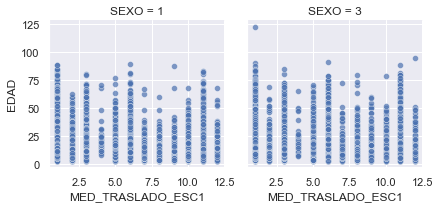

In [208]:
g = sns.FacetGrid(zmvm_esc, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_ESC1", "EDAD", alpha=.7)
g.add_legend()

In [209]:
zmvm_esc.dtypes

Unnamed: 0             int64
ENT_x                  int64
MUN_x                  int64
ID_VIV                 int64
ID_PERSONA             int64
SEXO                   int64
EDAD                   int64
SERSALUD               int64
DHSERSAL1              int64
DIS_VER                int64
DIS_OIR                int64
DIS_CAMINAR            int64
DIS_RECORDAR           int64
ASISTEN              float64
MUN_ASI              float64
ENT_PAIS_ASI         float64
TIE_TRASLADO_ESCU    float64
MED_TRASLADO_ESC1    float64
MED_TRASLADO_ESC2    float64
MED_TRASLADO_ESC3    float64
NIVACAD              float64
ESCOLARI             float64
ESCOACUM             float64
AUTOPROP             float64
MOTOCICLETA          float64
BICICLETA            float64
INGTRHOG             float64
JEFE_SEXO              int64
JEFE_EDAD              int64
dtype: object

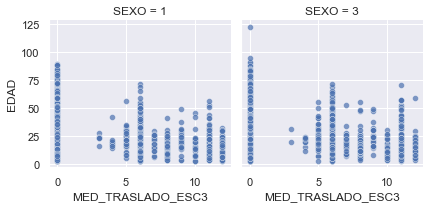

In [210]:
g = sns.FacetGrid(zmvm_esc, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_ESC3", "EDAD", alpha=.7)
g.add_legend()

In [211]:
zmvm_esc.dtypes

Unnamed: 0             int64
ENT_x                  int64
MUN_x                  int64
ID_VIV                 int64
ID_PERSONA             int64
SEXO                   int64
EDAD                   int64
SERSALUD               int64
DHSERSAL1              int64
DIS_VER                int64
DIS_OIR                int64
DIS_CAMINAR            int64
DIS_RECORDAR           int64
ASISTEN              float64
MUN_ASI              float64
ENT_PAIS_ASI         float64
TIE_TRASLADO_ESCU    float64
MED_TRASLADO_ESC1    float64
MED_TRASLADO_ESC2    float64
MED_TRASLADO_ESC3    float64
NIVACAD              float64
ESCOLARI             float64
ESCOACUM             float64
AUTOPROP             float64
MOTOCICLETA          float64
BICICLETA            float64
INGTRHOG             float64
JEFE_SEXO              int64
JEFE_EDAD              int64
dtype: object

In [212]:
print (zmvm_esc.loc[zmvm_esc['EDAD'] == 122])

        Unnamed: 0  ENT_x  MUN_x        ID_VIV         ID_PERSONA  SEXO  EDAD  \
409399      227606     15     25  150250005152  15025000515200002     3   122   

        SERSALUD  DHSERSAL1  DIS_VER  DIS_OIR  DIS_CAMINAR  DIS_RECORDAR  \
409399         8          1        1        1            1             1   

        ASISTEN  MUN_ASI  ENT_PAIS_ASI  TIE_TRASLADO_ESCU  MED_TRASLADO_ESC1  \
409399      1.0     25.0          15.0                1.0                1.0   

        MED_TRASLADO_ESC2  MED_TRASLADO_ESC3  NIVACAD  ESCOLARI  ESCOACUM  \
409399                0.0                0.0      2.0       6.0       6.0   

        AUTOPROP  MOTOCICLETA  BICICLETA  INGTRHOG  JEFE_SEXO  JEFE_EDAD  
409399       7.0          1.0        3.0    6000.0          1         54  


array([[<AxesSubplot:title={'center':'TIE_TRASLADO_ESCU'}>]], dtype=object)

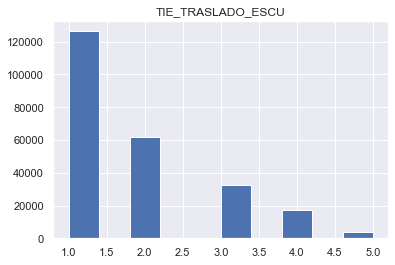

In [213]:
zmvm_esc.hist('TIE_TRASLADO_ESCU') 

array([[<AxesSubplot:title={'center':'MED_TRASLADO_ESC1'}>]], dtype=object)

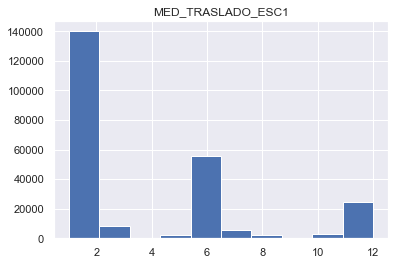

In [214]:
zmvm_esc.hist('MED_TRASLADO_ESC1') 

array([[<AxesSubplot:title={'center':'MED_TRASLADO_ESC2'}>]], dtype=object)

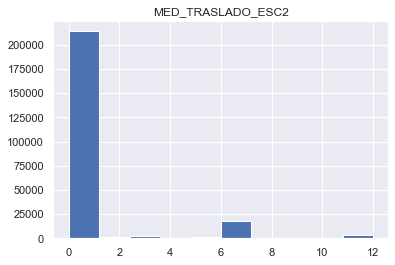

In [215]:
zmvm_esc.hist('MED_TRASLADO_ESC2') 

array([[<AxesSubplot:title={'center':'MED_TRASLADO_ESC3'}>]], dtype=object)

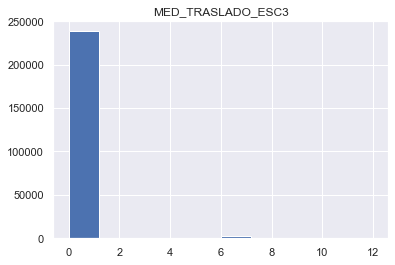

In [216]:
zmvm_esc.hist('MED_TRASLADO_ESC3') 

In [283]:
zmvm_esc.to_csv('zmvm_esc.csv')

In [356]:
zmvm_esc2 = zmvm_esc.copy()

In [357]:
zmvm_esc2.columns

Index(['Unnamed: 0', 'ENT_x', 'MUN_x', 'ID_VIV', 'ID_PERSONA', 'SEXO', 'EDAD',
       'SERSALUD', 'DHSERSAL1', 'DIS_VER', 'DIS_OIR', 'DIS_CAMINAR',
       'DIS_RECORDAR', 'ASISTEN', 'MUN_ASI', 'ENT_PAIS_ASI',
       'TIE_TRASLADO_ESCU', 'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2',
       'MED_TRASLADO_ESC3', 'NIVACAD', 'ESCOLARI', 'ESCOACUM', 'AUTOPROP',
       'MOTOCICLETA', 'BICICLETA', 'INGTRHOG', 'JEFE_SEXO', 'JEFE_EDAD'],
      dtype='object')

In [358]:
zmvm_esc2['CAMINA_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 1) | (zmvm_esc2['MED_TRASLADO_ESC2']== 1) |(zmvm_esc2['MED_TRASLADO_ESC3']== 1) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True


In [359]:
zmvm_esc2['BICYCLE_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 2) | (zmvm_esc2['MED_TRASLADO_ESC2']== 2) |(zmvm_esc2['MED_TRASLADO_ESC3']== 2) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False


In [360]:
zmvm_esc2['SUBWAY_LR_CR_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 3) | (zmvm_esc2['MED_TRASLADO_ESC2']== 3) |(zmvm_esc2['MED_TRASLADO_ESC3']== 3) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False


In [361]:
zmvm_esc2['TRAMWAY_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 4) | (zmvm_esc2['MED_TRASLADO_ESC2']== 4) |(zmvm_esc2['MED_TRASLADO_ESC3']== 4) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False


In [362]:
zmvm_esc2['METROBUS_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 5) | (zmvm_esc2['MED_TRASLADO_ESC2']== 5) |(zmvm_esc2['MED_TRASLADO_ESC3']== 5) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False


In [363]:
zmvm_esc2['BUS_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 6) | (zmvm_esc2['MED_TRASLADO_ESC2']== 6) |(zmvm_esc2['MED_TRASLADO_ESC3']== 6) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False


In [364]:
zmvm_esc2['SCHOOL_TRANSPORTATION_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 7) | (zmvm_esc2['MED_TRASLADO_ESC2']== 7) |(zmvm_esc2['MED_TRASLADO_ESC3']== 7) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False


In [365]:
zmvm_esc2['TAXI_NOAPP_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 8) | (zmvm_esc2['MED_TRASLADO_ESC2']== 8) |(zmvm_esc2['MED_TRASLADO_ESC3']== 8) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False


In [366]:
zmvm_esc2['TAXI_APP_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 9) | (zmvm_esc2['MED_TRASLADO_ESC2']== 9) |(zmvm_esc2['MED_TRASLADO_ESC3']== 9) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False,False


In [367]:
zmvm_esc2['MOTO_SCOOTER_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 10) | (zmvm_esc2['MED_TRASLADO_ESC2']== 10) |(zmvm_esc2['MED_TRASLADO_ESC3']== 10) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False,False,False


In [368]:
zmvm_esc2['CAR_VAN_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 11) | (zmvm_esc2['MED_TRASLADO_ESC2']== 11) |(zmvm_esc2['MED_TRASLADO_ESC3']== 11) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False,False,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False,False,False,False


In [369]:
zmvm_esc2['OTHER_ESC'] = np.where((zmvm_esc2['MED_TRASLADO_ESC1']== 12) | (zmvm_esc2['MED_TRASLADO_ESC2']== 12) |(zmvm_esc2['MED_TRASLADO_ESC3']== 12) , True, False)
zmvm_esc2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_VIV,ID_PERSONA,SEXO,EDAD,SERSALUD,DHSERSAL1,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC,OTHER_ESC
6,6,9,2,90020000001,9002000000100007,3,14,1,1,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False
7,7,9,2,90020000001,9002000000100008,1,21,1,1,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False,False,False
9,9,9,2,90020000002,9002000000200002,1,24,1,1,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False,False,False,False,False
10,10,9,2,90020000002,9002000000200003,3,22,2,2,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False,False,False,False,False
18,18,9,2,90020000004,9002000000400001,1,10,1,1,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False,False,False,False,False


In [371]:
columns_to_drop3 = ['ID_VIV','SERSALUD','DHSERSAL1']

In [372]:
zmvm_esc2.drop(columns_to_drop3, axis=1, inplace=True)

In [373]:
zmvm_esc2

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC,OTHER_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False,False,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,15125000166600003,3,6,1,1,1,1,1.0,81.0,15.0,1.0,11.0,0.0,0.0,1.0,2.0,0.0,7.0,2.0,3.0,0.0,1,61,False,False,False,False,False,False,False,False,False,False,True,False
962372,1228475,15,125,15125000166900004,3,13,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,3.0,1.0,7.0,7.0,2.0,4.0,20000.0,1,42,False,False,False,False,False,False,False,False,False,False,True,False
962374,1228477,15,125,15125000167000002,1,4,1,1,1,1,1.0,59.0,15.0,1.0,8.0,0.0,0.0,1.0,1.0,0.0,7.0,2.0,4.0,13740.0,3,47,False,False,False,False,False,False,False,True,False,False,False,False
962378,1228481,15,125,15125000167100002,1,7,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,2.0,1.0,1.0,7.0,2.0,3.0,6000.0,1,32,False,False,False,False,False,False,False,False,False,False,True,False


In [382]:
def count_number_of_transport_means(row):
    number_of_transport_means = 0
    if row['MED_TRASLADO_ESC1'] > 0:
        number_of_transport_means += 1
    if row['MED_TRASLADO_ESC2'] > 0:
        number_of_transport_means += 1
    if row['MED_TRASLADO_ESC3'] > 0:
        number_of_transport_means += 1
    return number_of_transport_means

In [384]:
zmvm_esc2['number_of_transport_means'] = zmvm_esc2.apply(count_number_of_transport_means, axis=1)

In [387]:
zmvm_esc2['number_of_transport_means'].value_counts()

1    213959
2     24488
3      3705
Name: number_of_transport_means, dtype: int64

In [388]:
zmvm_esc2

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC,OTHER_ESC,number_of_transport_means
6,6,9,2,9002000000100007,3,14,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False,1
7,7,9,2,9002000000100008,1,21,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False,False,False,2
9,9,9,2,9002000000200002,1,24,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False,False,False,False,False,1
10,10,9,2,9002000000200003,3,22,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False,False,False,False,False,2
18,18,9,2,9002000000400001,1,10,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,15125000166600003,3,6,1,1,1,1,1.0,81.0,15.0,1.0,11.0,0.0,0.0,1.0,2.0,0.0,7.0,2.0,3.0,0.0,1,61,False,False,False,False,False,False,False,False,False,False,True,False,1
962372,1228475,15,125,15125000166900004,3,13,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,3.0,1.0,7.0,7.0,2.0,4.0,20000.0,1,42,False,False,False,False,False,False,False,False,False,False,True,False,1
962374,1228477,15,125,15125000167000002,1,4,1,1,1,1,1.0,59.0,15.0,1.0,8.0,0.0,0.0,1.0,1.0,0.0,7.0,2.0,4.0,13740.0,3,47,False,False,False,False,False,False,False,True,False,False,False,False,1
962378,1228481,15,125,15125000167100002,1,7,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,2.0,1.0,1.0,7.0,2.0,3.0,6000.0,1,32,False,False,False,False,False,False,False,False,False,False,True,False,1
